In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

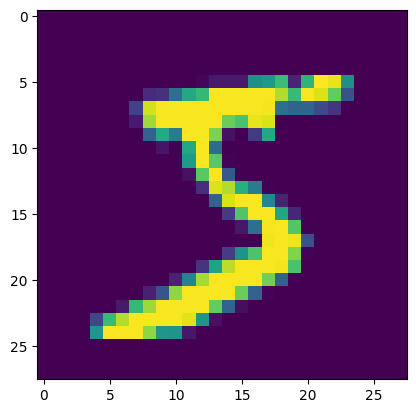

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
X_train.max()

255

In [ ]:
X_test.max()

255

In [ ]:
X_test = X_test/255
X_train = X_train/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

In [ ]:
# converting 28*28 pixel pic data into 1D data
model.add(Flatten(input_shape = (28,28)))

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy')

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0227 - val_loss: 0.1290
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0189 - val_loss: 0.1279
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0154 - val_loss: 0.1524
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0135 - val_loss: 0.1568
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0127 - val_loss: 0.1619
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0111 - val_loss: 0.1594
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0091 - val_loss: 0.1638
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0088 - val_loss: 0.1783
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0071 - val_loss: 0.1690
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.00

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9771

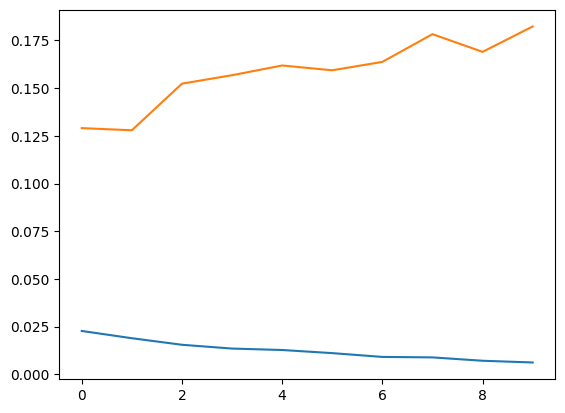

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

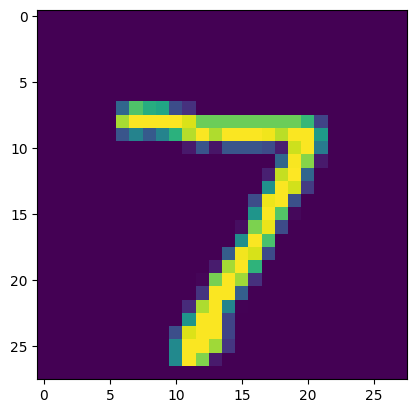

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 55ms/step


array([7])